In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
with open('results/run_23-05-2024__1714.txt', 'r') as file:
    data = file.read()

In [3]:
metadata_pattern = r"transformations:(\d+), subDepth: (\d+), doShuffling: (\w+), dir: (.+)"
metadata_match = re.search(metadata_pattern, data)
transformations = int(metadata_match.group(1))
subDepth = int(metadata_match.group(2))
doShuffling = metadata_match.group(3) == 'True'
directory = metadata_match.group(4)

In [4]:
file_data_pattern = r"\('(.+)', '(.+)', '(.+)', ([\d.]+), ([\d.]+)\)"
file_data_matches = re.findall(file_data_pattern, data)

In [5]:
columns = ['Filename', 'Benchmark_Satisfiability', 'Post_Transform_Satisfiability', 'Pre_Transform_Solving_Time', 'Post_Transform_Solving_Time']
df = pd.DataFrame(file_data_matches, columns=columns)

In [6]:
df['Pre_Transform_Solving_Time'] = pd.to_numeric(df['Pre_Transform_Solving_Time'])
df['Post_Transform_Solving_Time'] = pd.to_numeric(df['Post_Transform_Solving_Time'])

Q1_pre = df['Pre_Transform_Solving_Time'].quantile(0.25)
Q3_pre = df['Pre_Transform_Solving_Time'].quantile(0.75)
IQR_pre = Q3_pre - Q1_pre

Q1_post = df['Post_Transform_Solving_Time'].quantile(0.25)
Q3_post = df['Post_Transform_Solving_Time'].quantile(0.75)
IQR_post = Q3_post - Q1_post

# Define outlier criteria
lower_bound_pre = Q1_pre - 1.5 * IQR_pre
upper_bound_pre = Q3_pre + 1.5 * IQR_pre

lower_bound_post = Q1_post - 1.5 * IQR_post
upper_bound_post = Q3_post + 1.5 * IQR_post

df_no_outliers = df[
    (df['Pre_Transform_Solving_Time'] >= lower_bound_pre) & 
    (df['Pre_Transform_Solving_Time'] <= upper_bound_pre) &
    (df['Post_Transform_Solving_Time'] >= lower_bound_post) & 
    (df['Post_Transform_Solving_Time'] <= upper_bound_post)
]

# Save to CSV
csv_filename = 'results.csv'
df_no_outliers.to_csv(csv_filename, index=False)
print(f"Data saved to {csv_filename}")

Data saved to results.csv


In [7]:
df_no_outliers.head()

,Filename,Benchmark_Satisfiability,Post_Transform_Satisfiability,Pre_Transform_Solving_Time,Post_Transform_Solving_Time
5,benchmarks/non-incremental/LIA/20190429-Ultima...,unsat,unsat,0.008743,0.009010
6,benchmarks/non-incremental/LIA/20190429-Ultima...,unsat,unsat,0.008353,0.012426
7,benchmarks/non-incremental/LIA/20190429-Ultima...,unsat,unsat,0.009664,0.008216
8,benchmarks/non-incremental/LIA/20190429-Ultima...,unsat,unsat,0.006837,0.011922
12,benchmarks/non-incremental/LIA/20190429-Ultima...,unsat,unsat,0.011120,0.019738


In [8]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

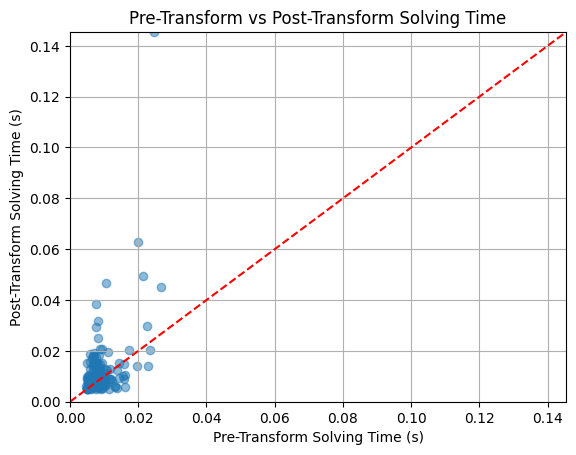

In [9]:
plt.scatter(df['Pre_Transform_Solving_Time'], df['Post_Transform_Solving_Time'], alpha=0.5)
plt.plot([0, max(df['Pre_Transform_Solving_Time'].max(), df['Post_Transform_Solving_Time'].max())], 
         [0, max(df['Pre_Transform_Solving_Time'].max(), df['Post_Transform_Solving_Time'].max())], 'r--')  # Identity line
plt.title('Pre-Transform vs Post-Transform Solving Time')
plt.xlabel('Pre-Transform Solving Time (s)')
plt.ylabel('Post-Transform Solving Time (s)')
plt.xlim(0, max(df['Pre_Transform_Solving_Time'].max(), df['Post_Transform_Solving_Time'].max()))
plt.ylim(0, max(df['Pre_Transform_Solving_Time'].max(), df['Post_Transform_Solving_Time'].max()))
plt.grid(True)
plt.show()

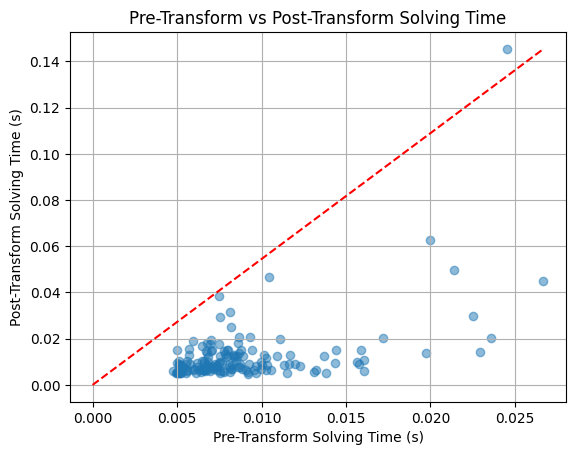

In [10]:
plt.scatter(df['Pre_Transform_Solving_Time'], df['Post_Transform_Solving_Time'], alpha=0.5)
plt.plot([0, df['Pre_Transform_Solving_Time'].max()], [0, df['Post_Transform_Solving_Time'].max()], 'r--')  # Identity line
plt.title('Pre-Transform vs Post-Transform Solving Time')
plt.xlabel('Pre-Transform Solving Time (s)')
plt.ylabel('Post-Transform Solving Time (s)')
plt.grid(True)
plt.show()

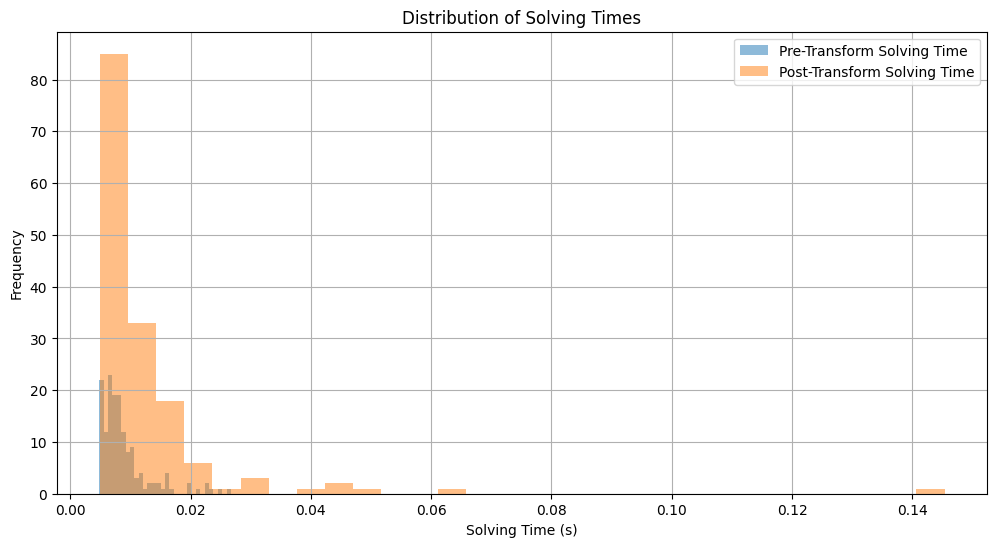

In [11]:
plt.figure(figsize=(12, 6))
plt.hist(df['Pre_Transform_Solving_Time'], bins=30, alpha=0.5, label='Pre-Transform Solving Time')
plt.hist(df['Post_Transform_Solving_Time'], bins=30, alpha=0.5, label='Post-Transform Solving Time')
plt.title('Distribution of Solving Times')
plt.xlabel('Solving Time (s)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

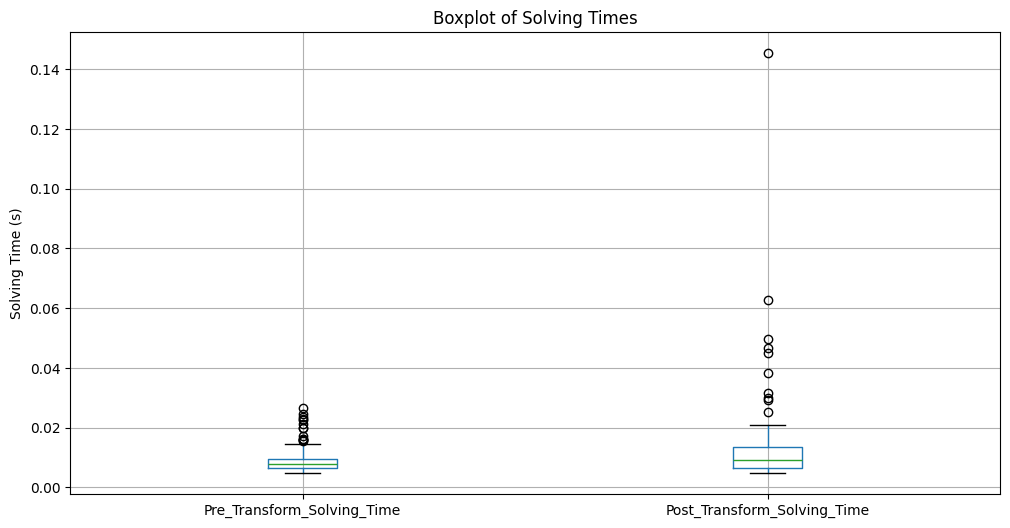

In [12]:
plt.figure(figsize=(12, 6))
df[['Pre_Transform_Solving_Time', 'Post_Transform_Solving_Time']].boxplot()
plt.title('Boxplot of Solving Times')
plt.ylabel('Solving Time (s)')
plt.grid(True)
plt.show()